<a href="https://colab.research.google.com/github/sebdavid3/Taller-2-Algoritmos-y-complejidad/blob/main/Taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sebastian David Ibañez NRC (2152)

Fabian Miranda NRC(2151)

**Puntos mas cercanos**

In [ ]:
import math
import random
import time
import plotly.graph_objects as go

NUM_PUNTOS = 500
RANGO_X = (0, 1000)
RANGO_Y = (0, 1000)

class Punto:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def distancia(punto1, punto2):
    return math.sqrt((punto1.x - punto2.x)**2 + (punto1.y - punto2.y)**2)

def fuerzaBruta(puntos, n):
    distancia_minima = float('inf')
    for i in range(n):
        for j in range(i+1, n):
            if distancia(puntos[i], puntos[j]) < distancia_minima:
                distancia_minima = distancia(puntos[i], puntos[j])
                par_mas_cercano = (puntos[i], puntos[j])
    return par_mas_cercano, distancia_minima

def grupoPuntosCercanos(grupo_puntos_cercanos, tamaño, d):
    distancia_minima = d
    par_mas_cercano = None

    for i in range(tamaño):
        for j in range(i+1, tamaño):
            if (grupo_puntos_cercanos[j].y - grupo_puntos_cercanos[i].y) < distancia_minima:
                if distancia(grupo_puntos_cercanos[i], grupo_puntos_cercanos[j]) < distancia_minima:
                    distancia_minima = distancia(grupo_puntos_cercanos[i], grupo_puntos_cercanos[j])
                    par_mas_cercano = (grupo_puntos_cercanos[i], grupo_puntos_cercanos[j])

    return par_mas_cercano, distancia_minima

# Función recursiva para encontrar la menor distancia
def utilMasCercana(puntos_x, puntos_y, n):
    if n <= 3:
        return fuerzaBruta(puntos_x, n)

    medio = n // 2
    punto_medio = puntos_x[medio]

    puntos_y_izq = [p for p in puntos_y if p.x <= punto_medio.x]
    puntos_y_der = [p for p in puntos_y if p.x > punto_medio.x]

    (p1, q1), distancia_izq = utilMasCercana(puntos_x[:medio], puntos_y_izq, medio)
    (p2, q2), distancia_der = utilMasCercana(puntos_x[medio:], puntos_y_der, n - medio)

    if distancia_izq < distancia_der:
        distancia_minima = distancia_izq
        par_mas_cercano = (p1, q1)
    else:
        distancia_minima = distancia_der
        par_mas_cercano = (p2, q2)

    grupo_puntos_cercanos = [p for p in puntos_y if abs(p.x - punto_medio.x) < distancia_minima]

    par_grupo, distancia_grupo = grupoPuntosCercanos(grupo_puntos_cercanos, len(grupo_puntos_cercanos), distancia_minima)

    if distancia_grupo < distancia_minima:
        return par_grupo, distancia_grupo
    else:
        return par_mas_cercano, distancia_minima

def masCercana(puntos, n):
    puntos_x = sorted(puntos, key=lambda p: p.x)
    puntos_y = sorted(puntos, key=lambda p: p.y)
    return utilMasCercana(puntos_x, puntos_y, n)

def generar_puntos_aleatorios(num_puntos, rango_x, rango_y):
    return [Punto(random.uniform(*rango_x), random.uniform(*rango_y)) for _ in range(num_puntos)]

def medir_tiempo_ejecucion(puntos):
    start_time = time.perf_counter()
    puntos_mas_cercanos, distancia_mas_cercana = masCercana(puntos, len(puntos))
    end_time = time.perf_counter()
    return end_time - start_time, puntos_mas_cercanos, distancia_mas_cercana

def graficar_puntos(puntos, puntos_mas_cercanos, distancia_mas_cercana, tiempo_ejecucion):
    x = [p.x for p in puntos]
    y = [p.y for p in puntos]

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Puntos'))

    x_mas_cercanos = [puntos_mas_cercanos[0].x, puntos_mas_cercanos[1].x]
    y_mas_cercanos = [puntos_mas_cercanos[0].y, puntos_mas_cercanos[1].y]
    fig.add_trace(go.Scatter(x=x_mas_cercanos, y=y_mas_cercanos, mode='markers+lines', name='Puntos más cercanos', line=dict(color='red')))

    # Añadir texto con la distancia
    mid_x = (x_mas_cercanos[0] + x_mas_cercanos[1]) / 2
    mid_y = (y_mas_cercanos[0] + y_mas_cercanos[1]) / 2
    fig.add_trace(go.Scatter(x=[mid_x], y=[mid_y], text=[f'{distancia_mas_cercana:.2f}'], mode='text', textposition='top center'))

    fig.update_layout(
        title=f'Puntos y el par de puntos más cercanos<br>Tiempo de ejecución: {tiempo_ejecucion:.6f} segundos',
        xaxis_title='X',
        yaxis_title='Y',
        showlegend=True
    )

    fig.show()

puntos = generar_puntos_aleatorios(NUM_PUNTOS, RANGO_X, RANGO_Y)
tiempo_ejecucion, puntos_mas_cercanos, distancia_mas_cercana = medir_tiempo_ejecucion(puntos)
print(f"Tamaño del conjunto de puntos: {NUM_PUNTOS}")
print(f"Tiempo de ejecución: {tiempo_ejecucion:.6f} segundos")
print(f"El par de puntos más cercanos es: ({puntos_mas_cercanos[0].x}, {puntos_mas_cercanos[0].y}) y ({puntos_mas_cercanos[1].x}, {puntos_mas_cercanos[1].y}) con una distancia de {distancia_mas_cercana}\n")

graficar_puntos(puntos, puntos_mas_cercanos, distancia_mas_cercana, tiempo_ejecucion)


Tamaño del conjunto de puntos: 500
Tiempo de ejecución: 0.003981 segundos
El par de puntos más cercanos es: (683.8740715130954, 662.412942066832) y (681.7411528417506, 662.5649844052081) con una distancia de 2.138330875058876



**Multiplicacion de 2 numeros**

In [ ]:
def obtener_partes(num, n):
    str_num = str(num)
    mitad = len(str_num) // 2
    return int(str_num[:mitad]), int(str_num[mitad:])

def desplazar_izquierda(num, posiciones):
    return num * (10 ** posiciones)

def suma(num1, num2):
    return num1 + num2

def multiplicacion(x, y):
    if x < 10 or y < 10:
        return x * y

    n = max(len(str(x)), len(str(y)))
    mitad = n // 2

    x1, x0 = obtener_partes(x, mitad)
    y1, y0 = obtener_partes(y, mitad)

    z2 = multiplicacion(x1, y1)
    z0 = multiplicacion(x0, y0)
    z1 = multiplicacion(suma(x1, x0), suma(y1, y0)) - z2 - z0

    return desplazar_izquierda(z2, 2 * mitad) + desplazar_izquierda(z1, mitad) + z0

num1 = 234567893456789
num2 = 275348209374982374982374
resultado = multiplicacion(num1, num2)
print(f"El producto de {num1} y {num2} es {resultado}")

El producto de 234567893456789 y 275348209374982374982374 es 549794635062504866543504412757271098010765256


**Helecho**

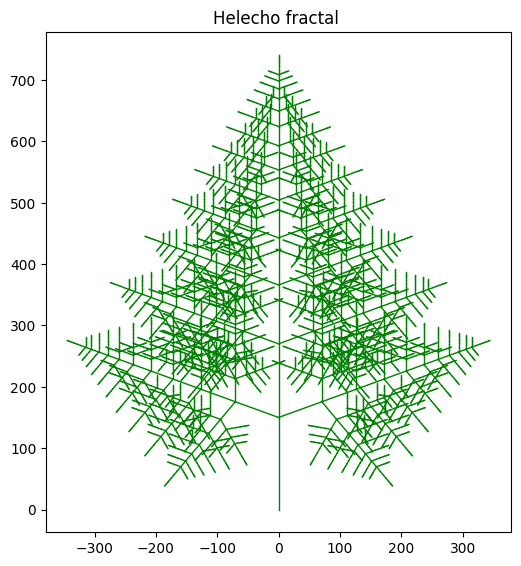

In [ ]:
import matplotlib.pyplot as plt
import math

# Función para dibujar una línea en un ángulo determinado
def draw_line(x, y, ang, alt):
    radians = math.radians(ang)
    x_new = x + alt * math.cos(radians)
    y_new = y + alt * math.sin(radians)
    plt.plot([x, x_new], [y, y_new], 'g', lw=1)
    return x_new, y_new

# Función principal
def PintaHelecho(x, y, ang, alt):
    if alt < 2:
        return

    # Dibujar el tallo principal
    x_new, y_new = draw_line(x, y, ang, alt)

    # Dibujar las ramas desde el punto base
    if alt > 10:  # Solo si la altura es suficientemente grande dibujamos ramas
        PintaHelecho(x_new, y_new, ang + 70, alt * 0.5)  # Rama izquierda
        PintaHelecho(x_new, y_new, ang - 70, alt * 0.5)  # Rama derecha

    # Continuar dibujando el tallo principal
    PintaHelecho(x_new, y_new, ang, alt * 0.8)  # Continuación del tallo principal

# Parámetros iniciales para el helecho
x_init = 0  # Coordenada inicial en x
y_init = 0  # Coordenada inicial en y
angulo_init = 90 # Ángulo inicial (vertical)
altura_init = 150 # Altura inicial del helecho

# Crear la figura y dibujar el helecho fractal
plt.figure(figsize=(6, 8))
PintaHelecho(x_init, y_init, angulo_init, altura_init)

# Configuración del gráfico
plt.title("Helecho fractal ")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()